In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
swing_merged = pd.read_csv("/Users/christopherhsu/Desktop/projects/swing analysis/data/swing_merged.csv")
outcomes_pivot = pd.read_csv("/Users/christopherhsu/Desktop/projects/swing analysis/data/outcomes_pivot_2025.csv")
merged_full = pd.read_csv("/Users/christopherhsu/Desktop/projects/swing analysis/data/merged_full.csv")

In [2]:
merged_full["delta_xwoba"] = merged_full["avg_xwoba_two"] - merged_full["avg_xwoba_non"]
merged_full["delta_ev"] = merged_full["avg_ev_two"] - merged_full["avg_ev_non"]
merged_full["delta_la"] = merged_full["avg_la_two"] - merged_full["avg_la_non"]
merged_full["delta_contact_rate"] = merged_full["contact_rate_two"] - merged_full["contact_rate_non"]


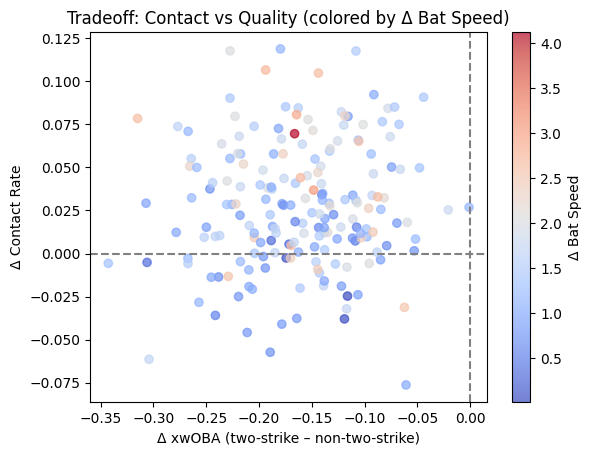

In [3]:
plt.scatter(merged_full["delta_xwoba"], merged_full["delta_contact_rate"],
            c=merged_full["delta_bat_speed"], cmap="coolwarm", alpha=0.7)
plt.axhline(0, color="gray", linestyle="--")
plt.axvline(0, color="gray", linestyle="--")
plt.xlabel("Δ xwOBA (two-strike – non-two-strike)")
plt.ylabel("Δ Contact Rate")
plt.title("Tradeoff: Contact vs Quality (colored by Δ Bat Speed)")
plt.colorbar(label="Δ Bat Speed")
plt.show()


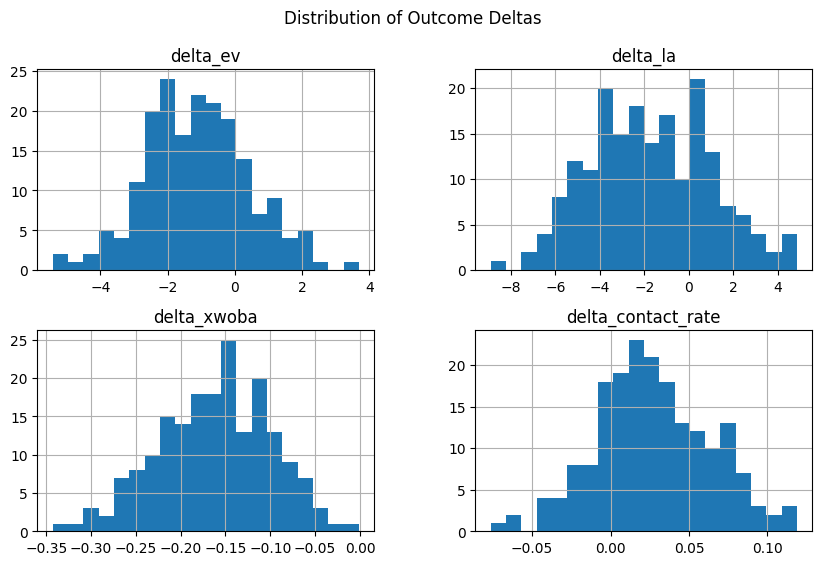

In [4]:
import matplotlib.pyplot as plt

merged_full[["delta_ev","delta_la","delta_xwoba","delta_contact_rate"]].hist(
    bins=20, figsize=(10,6))
plt.suptitle("Distribution of Outcome Deltas")
plt.show()


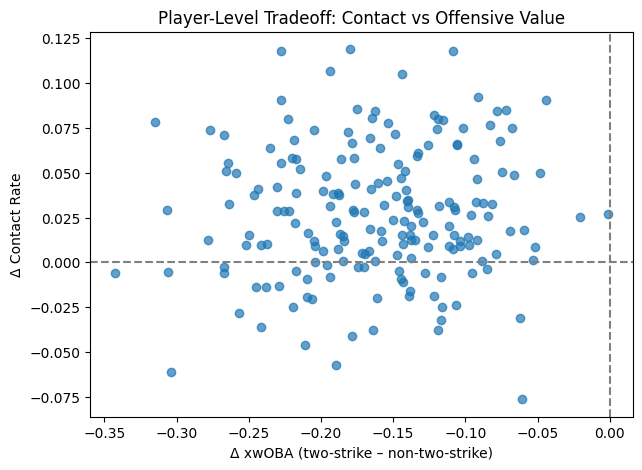

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.scatter(merged_full["delta_xwoba"], merged_full["delta_contact_rate"], alpha=0.7)
plt.axhline(0, color="gray", linestyle="--")
plt.axvline(0, color="gray", linestyle="--")
plt.xlabel("Δ xwOBA (two-strike – non-two-strike)")
plt.ylabel("Δ Contact Rate")
plt.title("Player-Level Tradeoff: Contact vs Offensive Value")
plt.show()


Loss due to tradeoffs in 2-strike counts

In [6]:
avg_loss = merged_full["delta_xwoba"].mean()
print("Average ΔxwOBA:", avg_loss)
# Biggest losers
worst = merged_full.nsmallest(5, "delta_xwoba")[["name", "delta_xwoba", "delta_contact_rate"]]

# Rare winners
best = merged_full.nlargest(5, "delta_xwoba")[["name", "delta_xwoba", "delta_contact_rate"]]

print("Worst xwOBA changes:\n", worst)
print("\nBest xwOBA changes:\n", best)


Average ΔxwOBA: -0.16161379841173873
Worst xwOBA changes:
                   name  delta_xwoba  delta_contact_rate
15         Wood, James    -0.342752           -0.005704
1          Cruz, Oneil    -0.315077            0.078440
2      Schwarber, Kyle    -0.307010            0.029234
6   Morel, Christopher    -0.306047           -0.005151
69     Toglia, Michael    -0.304175           -0.061409

Best xwOBA changes:
                  name  delta_xwoba  delta_contact_rate
188      Arraez, Luis    -0.001102            0.026828
187      Kwan, Steven    -0.020787            0.025342
112   Kirk, Alejandro    -0.044119            0.090795
184     Frazier, Adam    -0.048009            0.049765
160  Horwitz, Spencer    -0.051777            0.008394


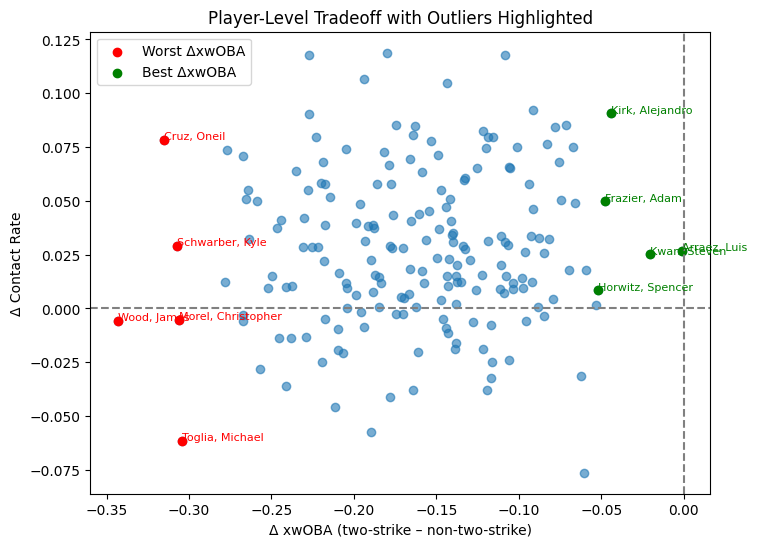

In [7]:
import matplotlib.pyplot as plt

# Compute top/bottom outliers in ΔxwOBA
worst = merged_full.nsmallest(5, "delta_xwoba")
best = merged_full.nlargest(5, "delta_xwoba")

plt.figure(figsize=(8,6))
plt.scatter(merged_full["delta_xwoba"], merged_full["delta_contact_rate"], alpha=0.6)

# Highlight worst and best
plt.scatter(worst["delta_xwoba"], worst["delta_contact_rate"], color="red", label="Worst ΔxwOBA")
plt.scatter(best["delta_xwoba"], best["delta_contact_rate"], color="green", label="Best ΔxwOBA")

# Label each highlighted player
for _, row in worst.iterrows():
    plt.text(row["delta_xwoba"], row["delta_contact_rate"], row["name"], fontsize=8, color="red")
for _, row in best.iterrows():
    plt.text(row["delta_xwoba"], row["delta_contact_rate"], row["name"], fontsize=8, color="green")

plt.axhline(0, color="gray", linestyle="--")
plt.axvline(0, color="gray", linestyle="--")
plt.xlabel("Δ xwOBA (two-strike – non-two-strike)")
plt.ylabel("Δ Contact Rate")
plt.title("Player-Level Tradeoff with Outliers Highlighted")
plt.legend()
plt.show()


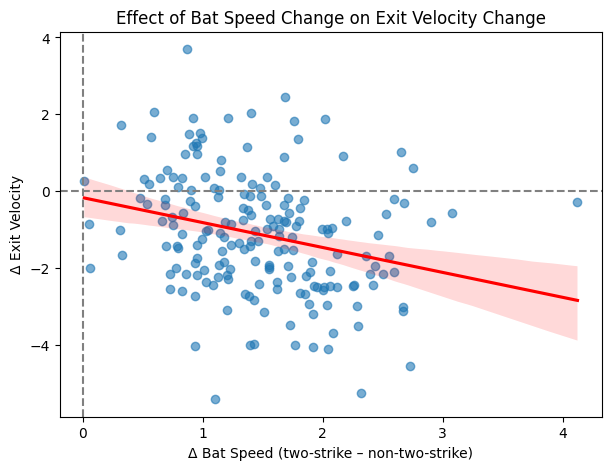

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,5))
sns.regplot(x="delta_bat_speed", y="delta_ev", data=merged_full,
            scatter_kws={"alpha":0.6}, line_kws={"color":"red"})
plt.axhline(0, color="gray", linestyle="--")
plt.axvline(0, color="gray", linestyle="--")
plt.xlabel("Δ Bat Speed (two-strike – non-two-strike)")
plt.ylabel("Δ Exit Velocity")
plt.title("Effect of Bat Speed Change on Exit Velocity Change")
plt.show()


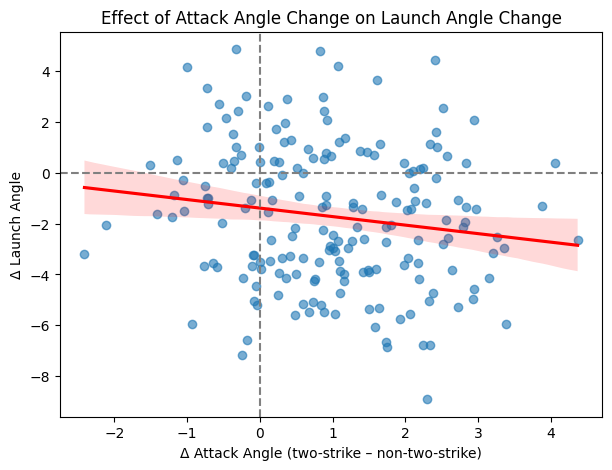

In [9]:
plt.figure(figsize=(7,5))
sns.regplot(x="delta_attack_angle", y="delta_la", data=merged_full,
            scatter_kws={"alpha":0.6}, line_kws={"color":"red"})
plt.axhline(0, color="gray", linestyle="--")
plt.axvline(0, color="gray", linestyle="--")
plt.xlabel("Δ Attack Angle (two-strike – non-two-strike)")
plt.ylabel("Δ Launch Angle")
plt.title("Effect of Attack Angle Change on Launch Angle Change")
plt.show()


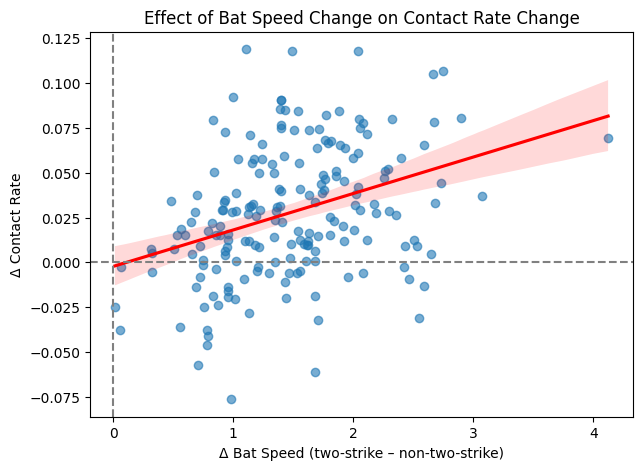

In [10]:
plt.figure(figsize=(7,5))
sns.regplot(x="delta_bat_speed", y="delta_contact_rate", data=merged_full,
            scatter_kws={"alpha":0.6}, line_kws={"color":"red"})
plt.axhline(0, color="gray", linestyle="--")
plt.axvline(0, color="gray", linestyle="--")
plt.xlabel("Δ Bat Speed (two-strike – non-two-strike)")
plt.ylabel("Δ Contact Rate")
plt.title("Effect of Bat Speed Change on Contact Rate Change")
plt.show()


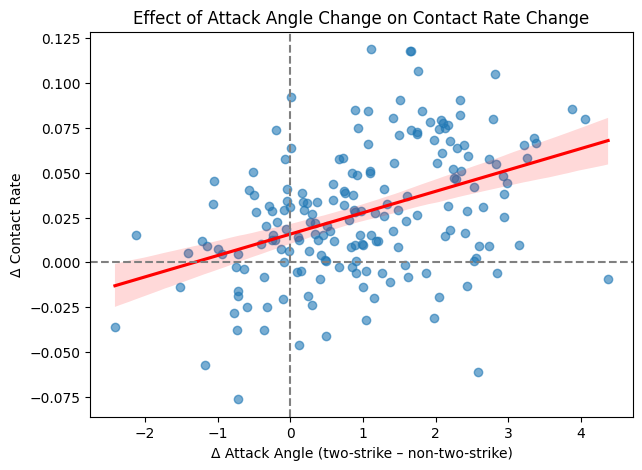

In [11]:
plt.figure(figsize=(7,5))
sns.regplot(x="delta_attack_angle", y="delta_contact_rate", data=merged_full,
            scatter_kws={"alpha":0.6}, line_kws={"color":"red"})
plt.axhline(0, color="gray", linestyle="--")
plt.axvline(0, color="gray", linestyle="--")
plt.xlabel("Δ Attack Angle (two-strike – non-two-strike)")
plt.ylabel("Δ Contact Rate")
plt.title("Effect of Attack Angle Change on Contact Rate Change")
plt.show()
